In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('ttrain.csv')
test_df=pd.read_csv('ttest.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#EDA kullanrak analiz yapacağız bunlar 
#veri boyutu
#veri türleri nasıl 
#eksik veri var mı 

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#eksik verileri doldurmamız lazım 
#age de ortalama ile 
#liman da sadece 2 eksik var bunları mod değerine göre alabiliriz 
#cabinde oransal olarak çok fazla eksik var onu tamamen silmemiz en mantıklısı olacak 

In [8]:
train_df.drop('Cabin',axis=1,inplace=True) #sütunun tamamını silip kalıcı olması için yazdık 
test_df.drop('Cabin',axis=1,inplace=True) 

In [9]:
train_df.head() #cabinin tamamı silinmiş 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
#medyan verileri ile doldurmak için kullanıyoruz 
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [11]:
# Limandaki eksikleri de en sık tekrar eden değerlerle dolduruyoruz
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


In [12]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#boş verileri ortadan kaldırdık 

In [14]:
#katagorik verileri sayısal verilere çevirmemiz lazım artık 
# cinsiyet kısmını sayısal değerlere dönüştürüyoruz
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# cabin kısımını sayısal değerlere dönüştürüyoruz
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


<Axes: xlabel='Sex'>

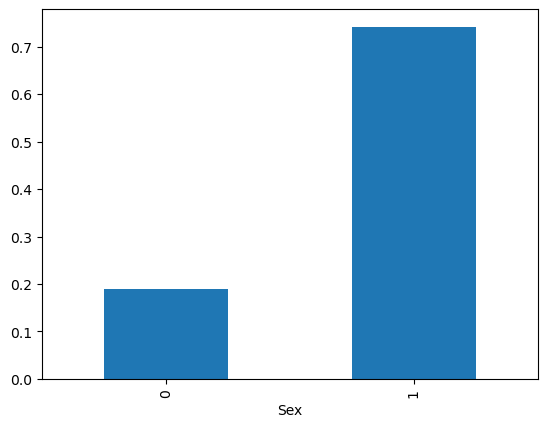

In [15]:
import matplotlib.pyplot as plt

# Yolcuların cinsiyetine göre hayatta kalma oranları
train_df.groupby('Sex')['Survived'].mean().plot(kind='bar')
#kadınların haytta kalma olasılığı ciddi oranda yüksek olduğunu anladık 

<Axes: xlabel='Pclass'>

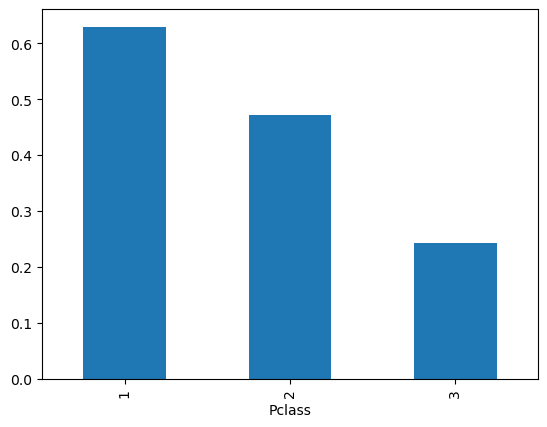

In [16]:
# Yolcu sınıfına göre hayatta kalma oranı
train_df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
#parayı veren düdüğü çalar mantığı var biraz anlaşıldığı üzere

<Axes: >

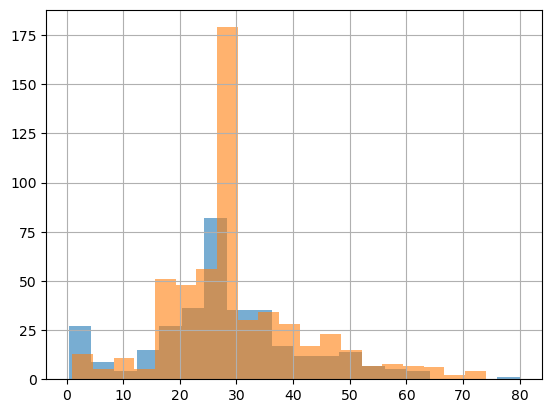

In [17]:
# Hayatta kalanlar ve kalmayanlar için yaş dağılımı 
train_df[train_df['Survived'] == 1]['Age'].hist(alpha=0.6, bins=20, label='Kurtulanlar') #sarılar
train_df[train_df['Survived'] == 0]['Age'].hist(alpha=0.6, bins=20, label='Kurtulamayanlar') #maviler 


In [18]:
#yaptığım grafik analizleri sonuçu olarak 
#Kadınların hayatta kalma oranı erkeklerden belirgin şekilde daha yüksek.
#Yolcu sınıfı yükseldikçe kurtulma şansı artıyor.
#Yaşın, hayatta kalma durumu üzerinde tek başına çok belirgin bir etkisi görünmüyor.

### Makina öğrenmesi kısmına geçiyoruz 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [27]:
confusion_matrix(y_test, y_pred)
#hayatta kalamadı da 89 doğru 16 yanlış var 
#hayatta kalanda 54 doğru 20 yanlış var 

array([[89, 16],
       [20, 54]], dtype=int64)

In [28]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.83       105\n           1       0.77      0.73      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf


0.8268156424581006

In [42]:
confusion_matrix(y_test, y_pred_rf)

array([[92, 13],
       [18, 56]], dtype=int64)

In [43]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86       105\n           1       0.81      0.76      0.78        74\n\n    accuracy                           0.83       179\n   macro avg       0.82      0.82      0.82       179\nweighted avg       0.83      0.83      0.83       179\n'

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [45]:
accuracy_dt

0.7988826815642458

In [46]:
confusion_matrix(y_test, y_pred_dt)

array([[87, 18],
       [18, 56]], dtype=int64)

In [47]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83       105\n           1       0.76      0.76      0.76        74\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [49]:
accuracy_gb

0.8044692737430168

In [50]:
confusion_matrix(y_test, y_pred_gb)

array([[94, 11],
       [24, 50]], dtype=int64)

In [51]:
classification_report(y_test, y_pred_gb)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.84       105\n           1       0.82      0.68      0.74        74\n\n    accuracy                           0.80       179\n   macro avg       0.81      0.79      0.79       179\nweighted avg       0.81      0.80      0.80       179\n'

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [53]:
accuracy_knn

0.7150837988826816

In [54]:
confusion_matrix(y_test, y_pred_knn)

array([[89, 16],
       [35, 39]], dtype=int64)

In [55]:
classification_report(y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.72      0.85      0.78       105\n           1       0.71      0.53      0.60        74\n\n    accuracy                           0.72       179\n   macro avg       0.71      0.69      0.69       179\nweighted avg       0.71      0.72      0.71       179\n'

### en iyi oran random forestta çıktı 